In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

In [7]:
season = pd.read_csv('data/shift_season.csv')
# s_10 = pd.read_csv('shift_10.csv')

In [9]:
season[(season.SEASON_ID == 22019) & (season.TEAM_ABBREVIATION == 'DAL')].tail()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,TEAM_TEST,TEST_OPP,ML_A,ML_B,TOTAL_OPEN,TOTAL_CLOSE,PTS_SPR_OPEN,PTS_SPR_CLOSE,GP,GAME_TOTAL
29147,22019,1610612742,DAL,Dallas Mavericks,21901271,2020-08-06,DAL vs. LAC,0.585714,267,116.771429,...,LAC,DAL,-180,160.0,231.5,230.5,-4.0,-4.0,70.0,237.0
29148,22019,1610612742,DAL,Dallas Mavericks,21901284,2020-08-08,DAL vs. MIL,0.577465,240,116.690141,...,MIL,DAL,-220,190.0,232.0,237.5,-5.0,-5.5,71.0,268.0
29149,22019,1610612742,DAL,Dallas Mavericks,21901293,2020-08-10,DAL @ UTA,0.583333,264,116.958333,...,DAL,UTA,200,-240.0,229.0,221.5,2.0,6.0,72.0,236.0
29150,22019,1610612742,DAL,Dallas Mavericks,21901300,2020-08-11,DAL vs. POR,0.589041,240,117.027397,...,POR,DAL,-145,125.0,237.5,240.0,-2.0,-3.0,73.0,265.0
29151,22019,1610612742,DAL,Dallas Mavericks,21901313,2020-08-13,DAL @ PHX,0.581081,241,117.216216,...,DAL,PHX,320,-380.0,229.0,238.5,6.5,8.5,74.0,230.0


In [10]:
season.columns

Index(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS', 'TEAM_ID_OPP',
       'TEAM_ABBREVIATION_OPP', 'TEAM_NAME_OPP', 'MATCHUP_OPP', 'WL_OPP',
       'MIN_OPP', 'PTS_OPP', 'FGM_OPP', 'FGA_OPP', 'FG_PCT_OPP', 'FG3M_OPP',
       'FG3A_OPP', 'FG3_PCT_OPP', 'FTM_OPP', 'FTA_OPP', 'FT_PCT_OPP',
       'OREB_OPP', 'DREB_OPP', 'REB_OPP', 'AST_OPP', 'STL_OPP', 'BLK_OPP',
       'TOV_OPP', 'PF_OPP', 'PLUS_MINUS_OPP', 'TEAM_TEST', 'TEST_OPP', 'ML_A',
       'ML_B', 'TOTAL_OPEN', 'TOTAL_CLOSE', 'PTS_SPR_OPEN', 'PTS_SPR_CLOSE',
       'GP', 'GAME_TOTAL'],
      dtype='object')

In [11]:
cols = ['WL', 'PTS', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS', 'ML_A', 'ML_B', 'TOTAL_OPEN', 'TOTAL_CLOSE', 'PTS_SPR_OPEN', 'PTS_SPR_CLOSE', 'GP', 'GAME_TOTAL']

d_cols = ['WL_OPP', 'PTS_OPP', 'FGM_OPP', 'FGA_OPP', 'FG_PCT_OPP', 'FG3M_OPP', 'FG3A_OPP', 'FG3_PCT_OPP', 'FTM_OPP', 'FTA_OPP', 'FT_PCT_OPP', 'REB_OPP', 'AST_OPP', 'STL_OPP', 'BLK_OPP', 'TOV_OPP', 'PF_OPP', 'ML_A', 'ML_B', 'TOTAL_OPEN', 'TOTAL_CLOSE', 'PTS_SPR_OPEN', 'PTS_SPR_CLOSE', 'GP', 'GAME_TOTAL']

Text(0.5, 1.0, 'OFFENSIVE STATS CORR MAP')

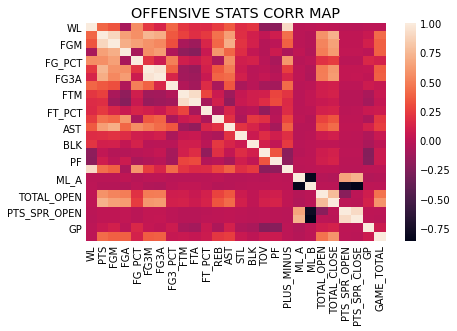

In [14]:
fig1,ax1 = plt.subplots()
sns.heatmap(season[cols].corr(), ax = ax1)
ax1.set_title('OFFENSIVE STATS CORR MAP')

Text(0.5, 1.0, 'DEFENSIVE STATS CORR MAP')

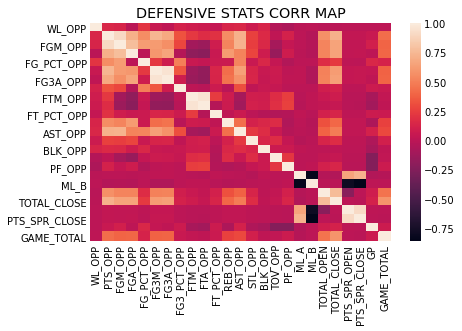

In [13]:
fig2,ax2 = plt.subplots()
sns.heatmap(season[d_cols].corr(), ax=ax2)
ax2.set_title('DEFENSIVE STATS CORR MAP')

In [ ]:
#sns.pairplot(season[cols])

In [18]:
pts_avg = season.groupby('SEASON_ID')['GAME_TOTAL'].mean().values
total_avg = season.groupby('SEASON_ID')['TOTAL_CLOSE'].mean().values
pts_max= season.groupby('SEASON_ID')['GAME_TOTAL'].max().values
pts_min= season.groupby('SEASON_ID')['GAME_TOTAL'].min().values
seasons = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019]
seasons_less = [2007, 2008, 2009, 2011, 2012, 2013, 2015,
       2016, 2017, 2018, 2019]
seasons_more = [2010, 2014]

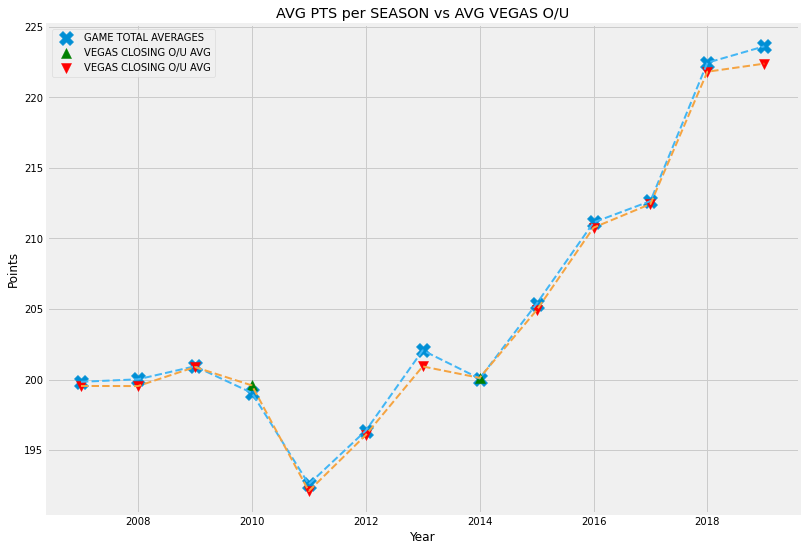

In [19]:
fig, ax = plt.subplots(figsize=(12,9))
ax.plot(seasons, pts_avg, ls = '--', lw = 2, c= '#42b6f5')
ax.plot(seasons, total_avg, ls = '--', lw = 2, c= '#f5a442')
ax.scatter(seasons,pts_avg, label='GAME TOTAL AVERAGES', marker='X', s=200)
ax.scatter(seasons_more,total_avg[total_avg > pts_avg], label = 'VEGAS CLOSING O/U AVG', marker= '^', s = 100, c = 'g')
ax.scatter(seasons_less,total_avg[total_avg < pts_avg], label = 'VEGAS CLOSING O/U AVG', marker= 'v', s=100, c = 'r')
# ax.scatter(seasons, pts_max, marker= '_', c='#f5d442')
# ax.scatter(seasons, pts_min, marker= '_', c='#f5d442')

ax.set_xlabel('Year')
ax.set_ylabel('Points')
ax.set_title('AVG PTS per SEASON vs AVG VEGAS O/U')
ax.legend()

In [46]:
['v' if x< pts_avg[idx] else '^' for idx, x in enumerate(total_avg)]

['v', 'v', 'v', '^', 'v', 'v', 'v', '^', 'v', 'v', 'v', 'v', 'v']

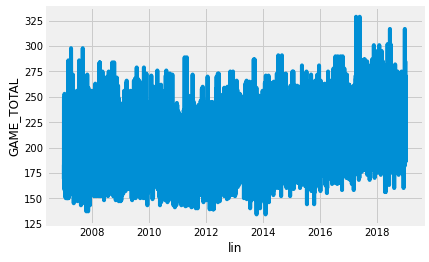

In [82]:
sns.lineplot('lin', 'GAME_TOTAL', data=season)

In [75]:
season['lin']= np.linspace(2007,2019, len(season))

In [76]:
season['lin']

0        2007.00000
1        2007.00039
2        2007.00078
3        2007.00117
4        2007.00156
            ...    
30761    2018.99844
30762    2018.99883
30763    2018.99922
30764    2018.99961
30765    2019.00000
Name: lin, Length: 30766, dtype: float64